In [1]:
# !pip install mediapipe

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

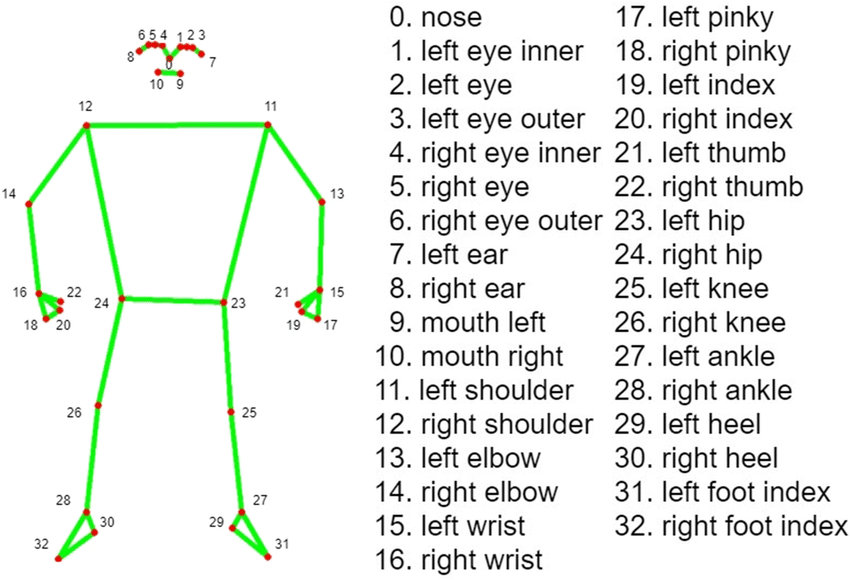

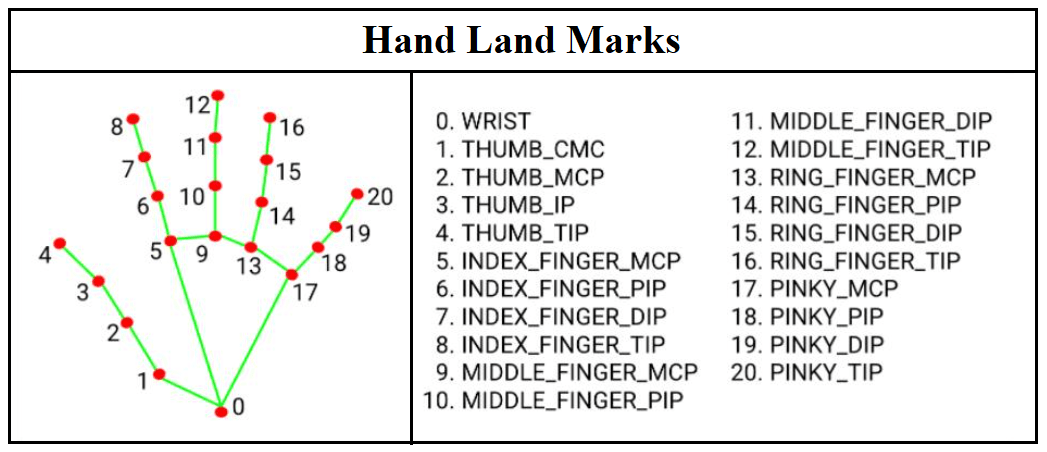

## KEYPOINT EXTRACTION

In [2]:
mp

<module 'mediapipe' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\__init__.py'>

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
mp_holistic

<module 'mediapipe.python.solutions.holistic' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\python\\solutions\\holistic.py'>

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [16]:
cap = cv2.VideoCapture("J:/AUTISM DETECTION PROJECT/3DCNN/videos/fear/fear20.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
s
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [10]:
# frame

In [17]:
# from PIL import Image
# import numpy as np

# # Open the image using Pillow (PIL)
# image_path = "20.jpg"
# image = Image.open(image_path)

# # Convert the image to a NumPy array
# image_array = np.array(image)

In [18]:
# image_array

In [19]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    image, results = mediapipe_detection(frame, holistic)

    draw_landmarks(frame, results)

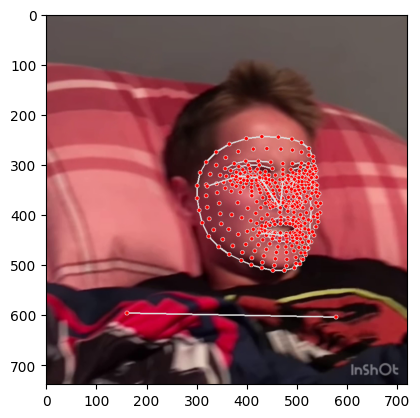

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [21]:
len(results.face_landmarks.landmark)

468

In [22]:
results.pose_landmarks.landmark

[x: 0.64975375
y: 0.52315056
z: -1.527365
visibility: 0.9948991
, x: 0.6563593
y: 0.44621333
z: -1.3973063
visibility: 0.99211943
, x: 0.67173177
y: 0.44623482
z: -1.3981615
visibility: 0.99175996
, x: 0.6886238
y: 0.4462997
z: -1.39868
visibility: 0.99117345
, x: 0.5918651
y: 0.4420277
z: -1.4649856
visibility: 0.9939388
, x: 0.5590221
y: 0.44022068
z: -1.4644037
visibility: 0.9946985
, x: 0.5266287
y: 0.43946302
z: -1.4653122
visibility: 0.9952331
, x: 0.68051714
y: 0.47327173
z: -0.6374378
visibility: 0.9935774
, x: 0.44697925
y: 0.4658054
z: -0.896767
visibility: 0.9977064
, x: 0.6652334
y: 0.5996859
z: -1.2345827
visibility: 0.99481165
, x: 0.59070146
y: 0.59163606
z: -1.3113875
visibility: 0.996786
, x: 0.80408925
y: 0.8189797
z: -0.10450689
visibility: 0.98468184
, x: 0.22480015
y: 0.8081914
z: -0.66537553
visibility: 0.9778667
, x: 1.1089017
y: 1.0982186
z: -0.037944414
visibility: 0.11984249
, x: 0.022936195
y: 1.2993668
z: -0.84281737
visibility: 0.41980428
, x: 1.0090784
y: 

In [23]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [24]:
pose

[array([ 0.64975375,  0.52315056, -1.52736497,  0.99489909]),
 array([ 0.65635931,  0.44621333, -1.39730632,  0.99211943]),
 array([ 0.67173177,  0.44623482, -1.39816153,  0.99175996]),
 array([ 0.68862379,  0.4462997 , -1.39867997,  0.99117345]),
 array([ 0.59186512,  0.44202769, -1.46498561,  0.9939388 ]),
 array([ 0.55902213,  0.44022068, -1.46440375,  0.99469852]),
 array([ 0.52662867,  0.43946302, -1.46531224,  0.99523312]),
 array([ 0.68051714,  0.47327173, -0.63743782,  0.99357742]),
 array([ 0.44697925,  0.46580541, -0.89676702,  0.99770641]),
 array([ 0.66523337,  0.59968591, -1.23458266,  0.99481165]),
 array([ 0.59070146,  0.59163606, -1.31138754,  0.996786  ]),
 array([ 0.80408925,  0.81897968, -0.10450689,  0.98468184]),
 array([ 0.22480015,  0.80819142, -0.66537553,  0.97786671]),
 array([ 1.10890174,  1.09821856, -0.03794441,  0.11984249]),
 array([ 0.0229362 ,  1.29936683, -0.84281737,  0.41980428]),
 array([ 1.00907838,  1.24256063, -0.60177141,  0.10803886]),
 array([

In [25]:
#33 for pose
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#468 for face
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
#21 for hand
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [26]:
len(face)

1404

In [27]:
lh,rh

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [28]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [29]:
face

array([ 0.67057449,  0.55025434, -0.04882928, ...,  0.73599499,
        0.44265729,  0.07255232])

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [31]:
result_test = extract_keypoints(results)

In [32]:
result_test

array([ 0.64975375,  0.52315056, -1.52736497, ...,  0.        ,
        0.        ,  0.        ])

In [33]:
468*3+33*4+21*3+21*3

1662

In [34]:
len(result_test)

1662

In [35]:
np.save('0', result_test)

In [36]:
np.load('0.npy')

array([ 0.64975375,  0.52315056, -1.52736497, ...,  0.        ,
        0.        ,  0.        ])

## DATA ARRANGEMENT

In [37]:
# !pip install moviepy

In [9]:
DATA_PATH = os.path.join('data2') 

# Actions that we try to detect
actions = np.array(['happy','sad','anger','surprise','fear','neutral'])
actions.sort()

# 62 videos
no_sequences = 62

# 30 frames
sequence_length = 30

#start new folder after 30 frames for data prep
start_folder = 30

In [39]:
os.makedirs('data/', exist_ok=True)

# Create subdirectories for each action
for action in actions:
    action_directory = os.path.join('data', action)
    os.makedirs(action_directory, exist_ok=True)

In [40]:
# import cv2
# import os

# # Video file path
# video_path = 'J:/AUTISM DETECTION PROJECT/3DCNN/videos/neutral/neutral13.mp4'

# # Create a directory to save frames
# output_directory = 'data2/neutral'
# os.makedirs(output_directory, exist_ok=True)

# # Open the video file
# cap = cv2.VideoCapture(video_path)

# frame_count = 0
# folder_count = 55
# frame_per_folder = 30
# fps = int(cap.get(cv2.CAP_PROP_FPS))

# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         if not ret:
#             break

#         image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#         draw_styled_landmarks(image, results)
    
        
#         if frame_count % frame_per_folder == 0:
#             current_folder = os.path.join(output_directory, f'{folder_count}')
#             os.makedirs(current_folder, exist_ok=True)
#             folder_count += 1

#         keypoints = extract_keypoints(results)
#         frame_name = os.path.join(current_folder, f'{frame_count % frame_per_folder}.npy')
        
#         np.save(frame_name, keypoints)
    
#         frame_count += 1
    
#         if frame_count >= frame_per_folder * folder_count:
#             break
    
#     # Release the video capture object
# cap.release()

# # Close all OpenCV windows (if any were opened)
# cv2.destroyAllWindows()


## Preprocess Data and Create Labels and Features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'anger': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

In [13]:
DATA_PATH

'data2'

In [45]:
# import os

# # Define the base directory
# base_directory = 'data2'

# # Iterate through the subdirectories in the base directory
# for root, dirs, files in os.walk(base_directory):
#     for subdir in dirs:
#         # Create the full path to the subdirectory
#         subdir_path = os.path.join(root, subdir)
#         # Use os.listdir to get the list of files in the subdirectory and count them
#         file_count = len(os.listdir(subdir_path))
#         if(file_count > 30):
#             print(f"Number of files in '{subdir_path}': {file_count}")


In [46]:
# import os

# # Define the path to the main directory containing the emotion categories (e.g., 'happy', 'sad', etc.)
# main_dir = 'data2/'

# # Loop through the emotion categories
# for emotion_category in os.listdir(main_dir):
#     category_path = os.path.join(main_dir, emotion_category)
    
#     # Check if it's a directory
#     if os.path.isdir(category_path):
#         # Get a list of subdirectories
#         subdirectories = os.listdir(category_path)
        
#         # Sort the subdirectories numerically
#         subdirectories.sort(key=lambda x: int(x))
        
#         # Rename the subdirectories from '1' to 'n'
#         for i, subdirectory in enumerate(subdirectories, start=1):
#             old_subdirectory_path = os.path.join(category_path, subdirectory)
#             new_subdirectory_path = os.path.join(category_path, str(i))
#             os.rename(old_subdirectory_path, new_subdirectory_path)
#             # print(old_subdirectory_path,new_subdirectory_path)


In [14]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [15]:
np.array(sequences).shape

(372, 30, 1662)

In [16]:
np.array(labels).shape

(372,)

In [17]:
X = np.array(sequences)

In [18]:
X.shape

(372, 30, 1662)

In [19]:
y = to_categorical(labels).astype(int)

In [20]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [22]:
y_test.shape

(19, 6)

## Build Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [31]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
import tensorflow as tf

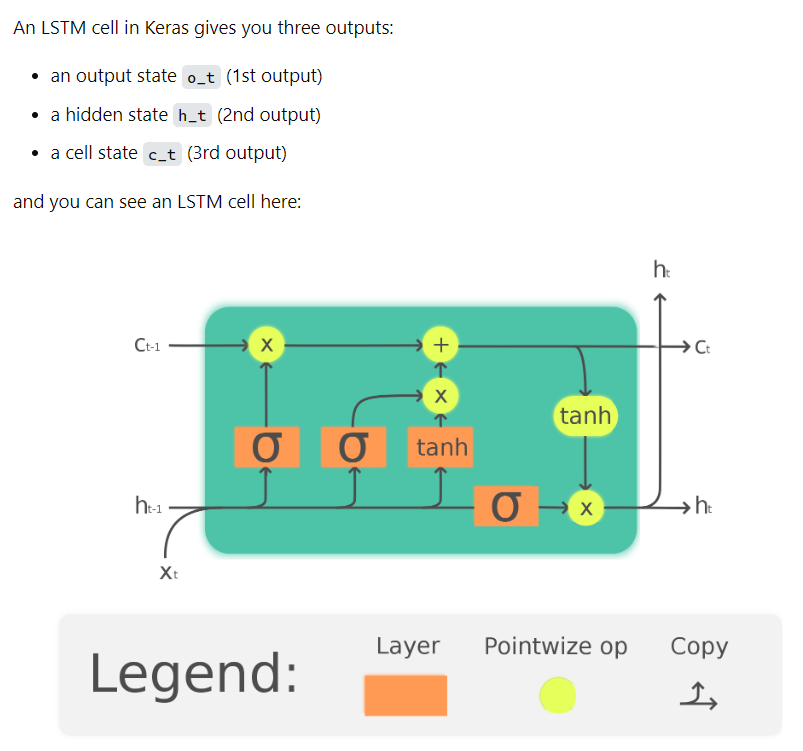

https://www.kaggle.com/code/kmkarakaya/lstm-output-types-return-sequences-state

In [33]:
class CustomAttention(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomAttention, self).__init__()

    def build(self, input_shape):
        super(CustomAttention, self).build(input_shape)

    def call(self, q, k, v):
        # Calculate attention scores using scalar dot product
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)
        
        output = tf.matmul(attention_scores, v)
        return output, attention_scores

In [34]:
model = Sequential()
lstm_layer = LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662), return_state=True)
output, state_h, state_c = lstm_layer(X_train) 

attention_layer = CustomAttention()
output, attention_scores = attention_layer(output, output, output)
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [70]:
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
12/12 [==============================] - 6s 297ms/step - loss: 0.3590 - categorical_accuracy: 0.7819
Epoch 2/250
12/12 [==============================] - 3s 269ms/step - loss: 0.3467 - categorical_accuracy: 0.8074
Epoch 3/250
12/12 [==============================] - 4s 297ms/step - loss: 0.3750 - categorical_accuracy: 0.8102
Epoch 4/250
12/12 [==============================] - 3s 276ms/step - loss: 0.4903 - categorical_accuracy: 0.7734
Epoch 5/250
12/12 [==============================] - 4s 298ms/step - loss: 0.4410 - categorical_accuracy: 0.7762
Epoch 6/250
12/12 [==============================] - 3s 262ms/step - loss: 0.3490 - categorical_accuracy: 0.7989
Epoch 7/250
12/12 [==============================] - 3s 274ms/step - loss: 0.3310 - categorical_accuracy: 0.8017
Epoch 8/250
12/12 [==============================] - 3s 292ms/step - loss: 0.3431 - categorical_accuracy: 0.8017
Epoch 9/250
12/12 [==============================] - 3s 268ms/step - loss: 0.3162 - categorical_

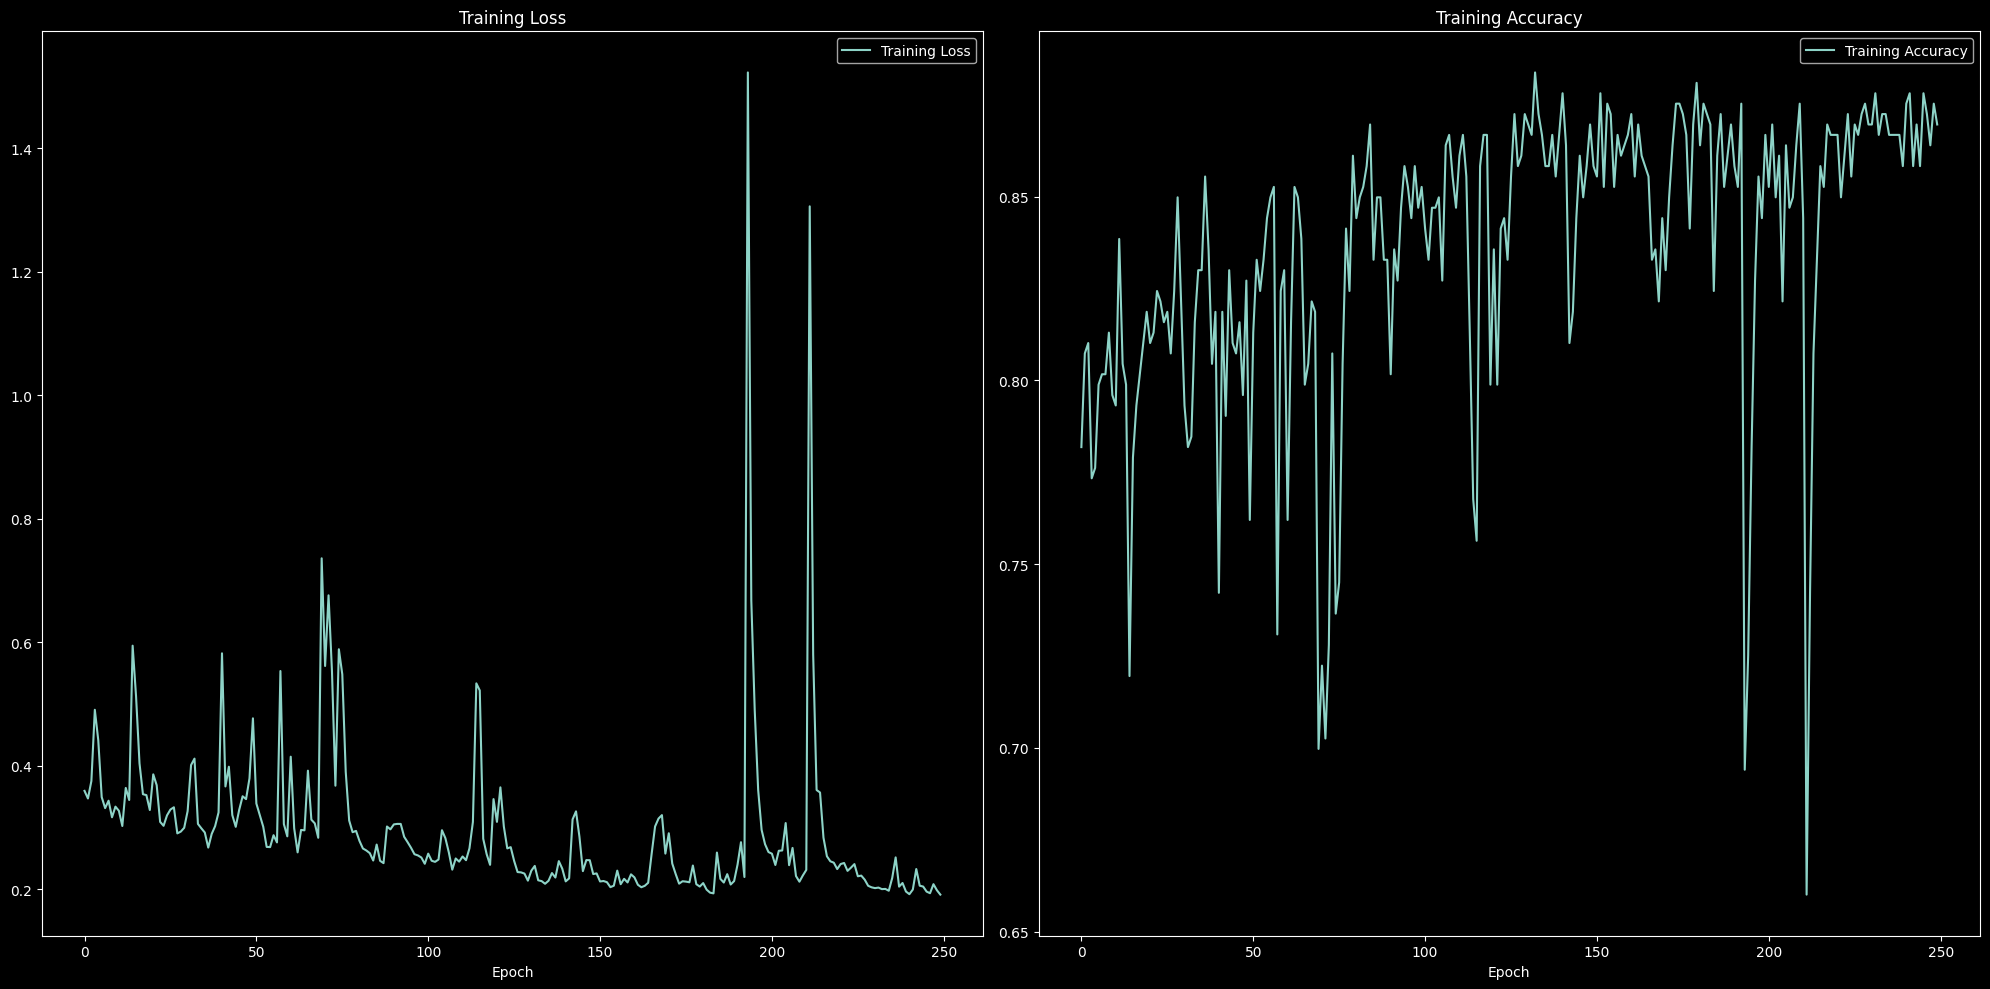

In [74]:
plt.style.use('dark_background')

# Plot loss and accuracy graphs
plt.figure(figsize=(20, 10))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [76]:
X_test

array([[[ 0.60634059,  0.55491072, -1.04024255, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.60117257,  0.55490822, -1.0157721 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.59768188,  0.55494666, -1.03387845, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.60330266,  0.54476851, -1.28660083, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.60203284,  0.54442257, -1.149984  , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.60027808,  0.54426688, -1.0694108 , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.45008788,  0.43938497, -0.86024487, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.45199773,  0.43498802, -0.85135192, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.45493028,  0.43431786, -0.8652218 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.48912162,  0.46616206, -1.00809395, ...,  

In [77]:
res

array([[1.02419709e-03, 6.98761865e-02, 3.16446210e-04, 2.17351690e-03,
        9.26606119e-01, 3.48273943e-06],
       [2.41978727e-02, 2.11289487e-04, 9.84726212e-05, 9.73983705e-01,
        1.50617631e-03, 2.36391861e-06],
       [1.44973995e-07, 9.40261089e-05, 9.99895334e-01, 2.35414498e-13,
        6.69110589e-09, 1.04258861e-05],
       [5.33037319e-20, 1.00000000e+00, 1.14485537e-12, 2.27933865e-33,
        2.44512770e-13, 1.22451477e-16],
       [6.10772113e-04, 3.47233668e-04, 1.90630977e-04, 8.35871504e-07,
        8.08751938e-05, 9.98769701e-01],
       [9.19653298e-10, 3.27045268e-06, 9.99992013e-01, 3.72214335e-16,
        2.15211408e-11, 4.78517040e-06],
       [1.18349574e-03, 3.20147615e-06, 2.28729462e-07, 9.98762727e-01,
        5.03340962e-05, 1.32531239e-08],
       [9.99679208e-01, 2.14269289e-06, 1.84599940e-05, 2.17540219e-04,
        8.27345575e-05, 5.01968293e-11],
       [4.95506811e-06, 3.36680204e-01, 2.24301675e-06, 7.25299424e-06,
        6.63294554e-01, 

In [78]:
actions[np.argmax(res[4])]

'surprise'

In [79]:
actions[np.argmax(y_test[4])]

'surprise'

In [81]:
model.save('action_with_AU.h5')

In [82]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [83]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 119ms/step


In [84]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [85]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[13,  1],
        [ 1,  4]],

       [[15,  2],
        [ 1,  1]],

       [[16,  0],
        [ 0,  3]],

       [[16,  1],
        [ 1,  1]],

       [[14,  1],
        [ 2,  2]],

       [[16,  0],
        [ 0,  3]]], dtype=int64)

In [87]:
accuracy_score(ytrue, yhat)

0.7368421052631579

In [88]:
for num, prob in enumerate(res):
    print(num,prob)

0 [1.0241971e-03 6.9876187e-02 3.1644621e-04 2.1735169e-03 9.2660612e-01
 3.4827394e-06]
1 [2.4197873e-02 2.1128949e-04 9.8472621e-05 9.7398371e-01 1.5061763e-03
 2.3639186e-06]
2 [1.4497400e-07 9.4026109e-05 9.9989533e-01 2.3541450e-13 6.6911059e-09
 1.0425886e-05]
3 [5.3303732e-20 1.0000000e+00 1.1448554e-12 2.2793386e-33 2.4451277e-13
 1.2245148e-16]
4 [6.1077211e-04 3.4723367e-04 1.9063098e-04 8.3587150e-07 8.0875194e-05
 9.9876970e-01]
5 [9.1965330e-10 3.2704527e-06 9.9999201e-01 3.7221433e-16 2.1521141e-11
 4.7851704e-06]
6 [1.1834957e-03 3.2014761e-06 2.2872946e-07 9.9876273e-01 5.0334096e-05
 1.3253124e-08]
7 [9.9967921e-01 2.1426929e-06 1.8459994e-05 2.1754022e-04 8.2734558e-05
 5.0196829e-11]
8 [4.9550681e-06 3.3668020e-01 2.2430168e-06 7.2529942e-06 6.6329455e-01
 1.0798502e-05]
9 [9.9993336e-01 2.6391163e-07 1.0451384e-08 4.7964328e-05 6.4556325e-06
 1.1861016e-05]
10 [9.9961507e-01 1.9766119e-06 9.7032135e-08 4.9632272e-05 4.2836073e-05
 2.9032878e-04]
11 [6.7488754e-01 2.

In [89]:
from scipy import stats

In [6]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0), (0, 0, 255)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


In [91]:
# prob_viz(res[0], actions, image, colors)

In [94]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res[2], actions, image, colors))

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.load_model("action_with_AU.h5")

In [114]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture("happy19.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

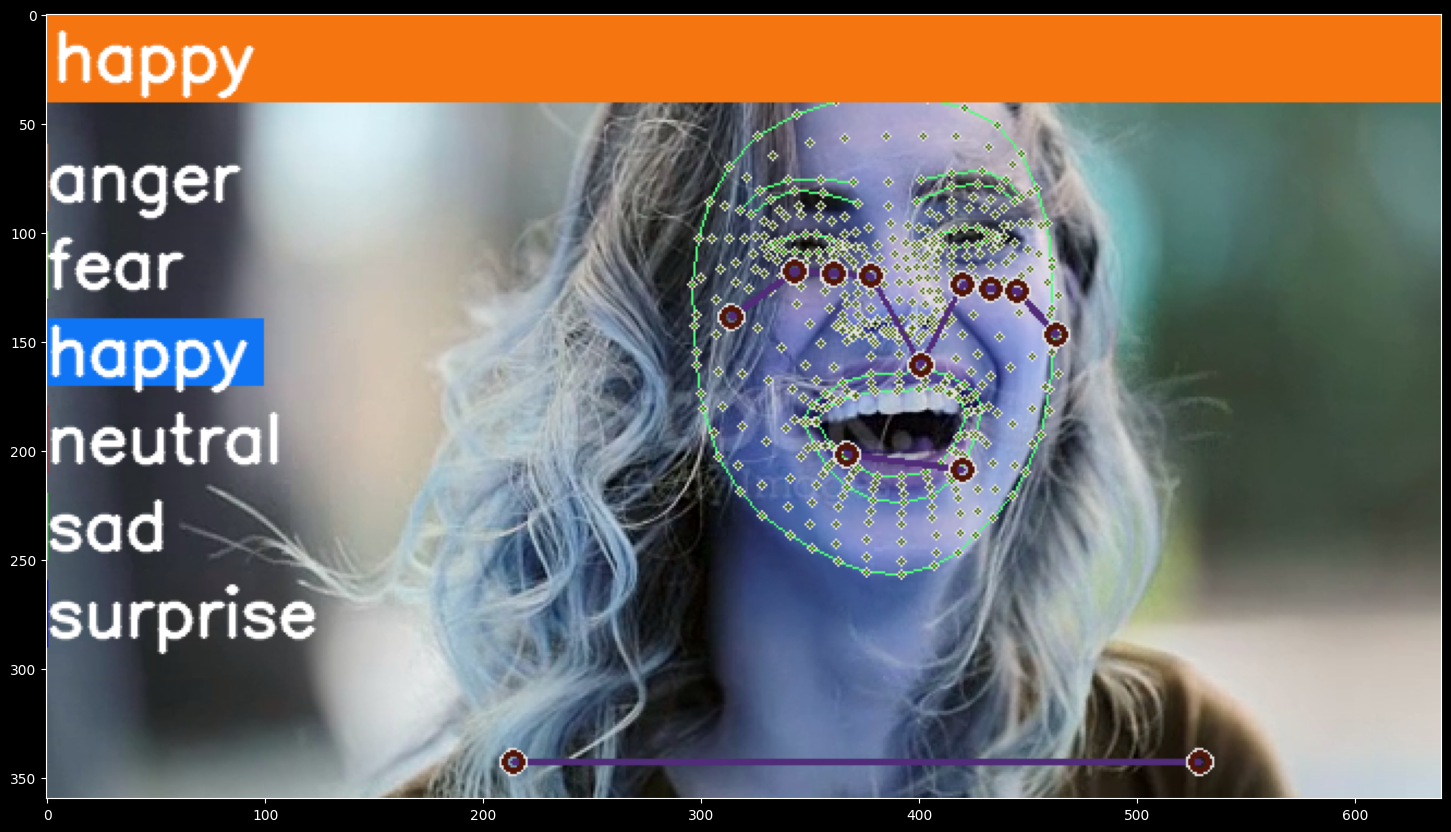

In [115]:
plt.figure(figsize=(18,18))
plt.imshow(image)

In [116]:
# history

In [117]:
res

array([4.63804595e-09, 6.73250815e-06, 9.99639392e-01, 6.21455791e-15,
       1.07316316e-10, 3.53939977e-04], dtype=float32)

In [120]:
emo=['happy','sad','anger','surprise','fear','neutral']
emo.sort()
res
for i in range(len(actions)):
    print(emo[i],"---->",res[i])

anger ----> 4.638046e-09
fear ----> 6.732508e-06
happy ----> 0.9996394
neutral ----> 6.214558e-15
sad ----> 1.07316316e-10
surprise ----> 0.00035393998


In [121]:
import numpy as np


# Get the indices of the top 3 elements
top_indices = np.argsort(res)[-2:][::-1]

print("Indices of the top 3 elements:", top_indices)

Indices of the top 3 elements: [2 5]


In [122]:
ans=[]

In [123]:
for i in top_indices:
    ans.append(actions[i])

In [124]:
ans

['happy', 'surprise']

In [126]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture("J:/AUTISM DETECTION PROJECT/3DCNN/videos/sad/sad30.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [127]:
res

array([6.3382367e-06, 2.3681512e-01, 3.0888137e-07, 2.6526527e-06,
       7.6315367e-01, 2.1926169e-05], dtype=float32)

In [128]:
emo=['happy','sad','anger','surprise','fear','neutral']
emo.sort()
res
for i in range(len(actions)):
    print(emo[i],"---->",res[i])

anger ----> 6.3382367e-06
fear ----> 0.23681512
happy ----> 3.0888137e-07
neutral ----> 2.6526527e-06
sad ----> 0.7631537
surprise ----> 2.192617e-05


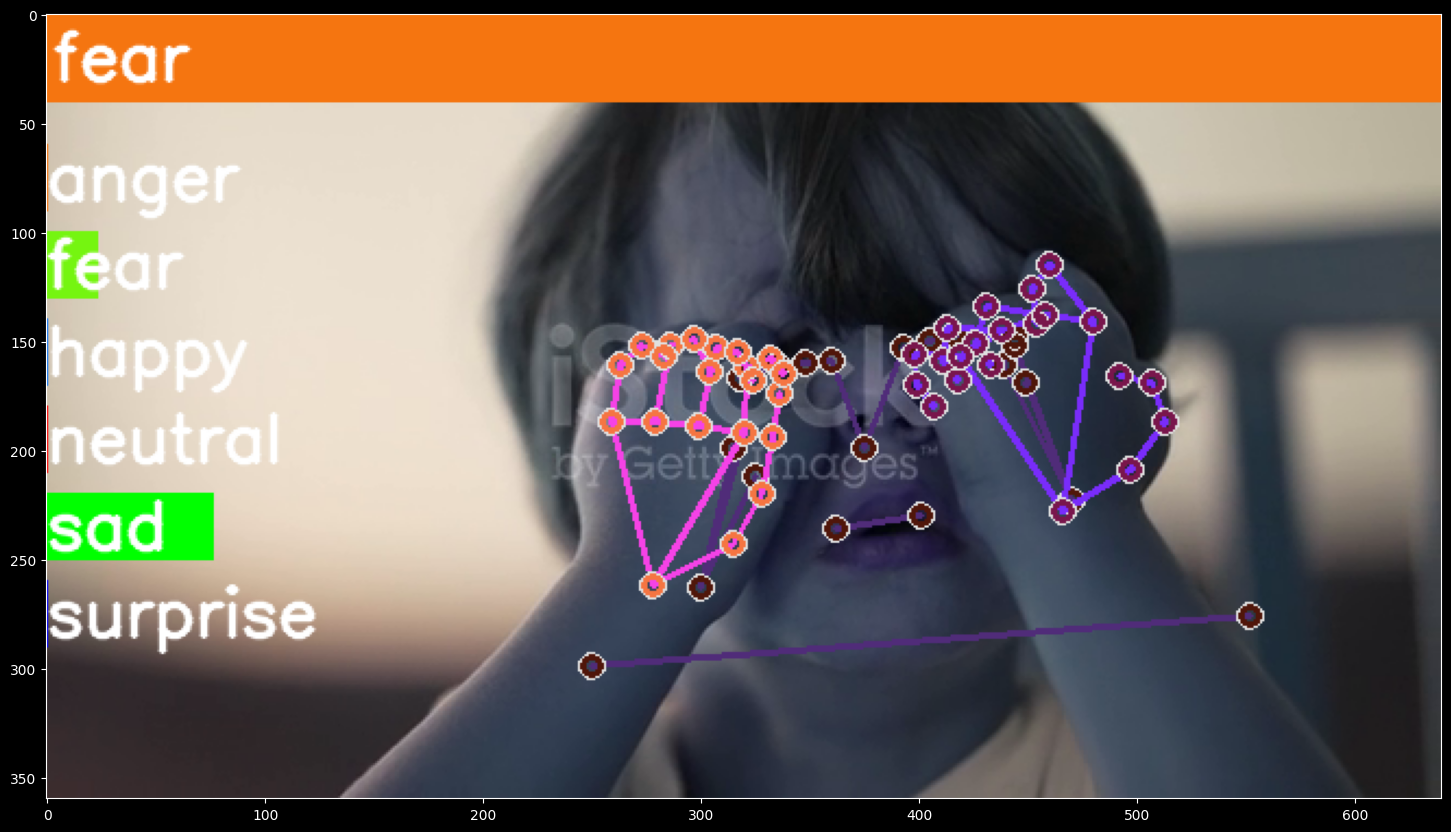

In [129]:
plt.figure(figsize=(18,18))
plt.imshow(image)

In [24]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

actions=['happy','sad','anger','surprise','fear','neutral']
actions.sort()

cap = cv2.VideoCapture("fear20.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [25]:
res

array([2.0994592e-04, 8.9758646e-01, 8.8897407e-02, 2.3654316e-06,
       4.6433862e-03, 8.6604021e-03], dtype=float32)

In [26]:
for i in range(len(actions)):
    print(actions[i],"---->",float(res[i]))

anger ----> 0.00020994592341594398
fear ----> 0.897586464881897
happy ----> 0.08889740705490112
neutral ----> 2.3654315555177163e-06
sad ----> 0.0046433862298727036
surprise ----> 0.008660402148962021


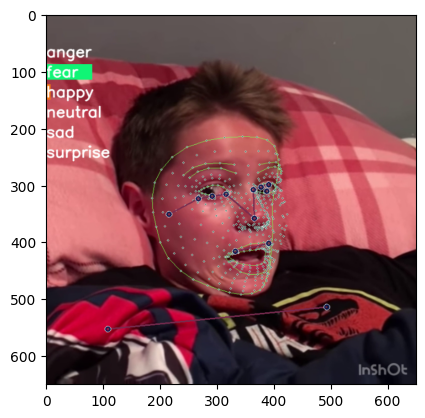

In [29]:
resized_image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (650, 650))
plt.imshow(resized_image)
plt.show()